In [1]:
import openmc
import openmc.deplete
import numpy as np
import matplotlib.pyplot as plt

# Materialer

In [2]:
#Materialer

fuel = openmc.Material(name='fuel')
hwater = openmc.Material(name='Hwater')
steel = openmc.Material(name='steel')
blanket = openmc.Material(name='blanket')

#Fuelsammensætning
fuel.add_nuclide('Li7',1)
fuel.add_element('F',5)
fuel.add_nuclide('U238',0.955) #0.955
fuel.add_nuclide('U235',0.045) #0.045 #berigelse
fuel.set_density('g/cm3',4.67) #4.67
fuel.volume = 500000
fuel.depletable = True

#Blanket
blanket.add_nuclide('Li7',1)
blanket.add_element('F',5)
blanket.add_nuclide('Th232',1)
blanket.set_density('g/cm3',4.47)
blanket.volume = 3000000
blanket.depletable = True

#Tungt vand sammensætning

hdens = 1.07
hwater.add_nuclide('H2',2)
hwater.add_element('O',1)
hwater.set_density('g/cm3', hdens) #1.07
hwater.volume = 3000000

#Stål (mangler Zr)
steel.add_element('Fe',0.8,'wo') #0.83
steel.add_element ('Zr',0.08, 'wo')
steel.add_element('C',0.02, 'wo')
steel.add_element('Mo',0.10,'wo')
steel.set_density('g/cm3', 7.73)#7.73

materials = openmc.Materials([fuel, hwater, steel,blanket])
materials.export_to_xml()

# Radier beregning

In [3]:
#radier beregning

V = 3000000
F = 0.12
Vi = F*V
Vy = (V-Vi)
r_indre_vand = np.cbrt((3/4)*Vi/np.pi)
v1 = 0.5+r_indre_vand
v2 = v1+2
v3 = v2+0.5
r_y_fuel = np.cbrt((3/(4*np.pi))*(500000+(4/3)*np.pi*((r_indre_vand+3)**3)))
v4 = r_y_fuel+0.5
v5 = v4+2
v6 = v5+0.5
r_ydre_vand = np.cbrt((3/4)*(Vy+(4/3)*np.pi*(v6**3))/np.pi)
v7 = r_ydre_vand+0.5
v8 = v7+2
v9 = v8+0.5
r_ydre_blanket = np.cbrt((3/4)*(V+(4/3)*np.pi*(v9**3))/np.pi)
v10 = r_ydre_blanket+0.5
rgeo = np.array([r_indre_vand,v1,v2,v3,r_y_fuel,v4,v5,v6,r_ydre_vand,v7,v8,v9,r_ydre_blanket,v10])



# Geometri

In [4]:
#Geometri
#scale = 26.041
#a = 0.1
#fueli = a
#fuelr = a
#rgeo = scale*np.array([1-fueli,1.01-fueli,1.02-fueli,1.03-fueli,1.26+fuelr,1.27+fuelr,1.28+fuelr,1.29+fuelr,1.58,1.59,1.60,1.61,1.91,1.92])

indre_sv1 = openmc.Sphere(r=rgeo[0])
ydre_sv1 = openmc.Sphere(r=rgeo[1])
indre_sv2 = openmc.Sphere(r=rgeo[2])
ydre_sv2 = openmc.Sphere(r=rgeo[3])
indre_sv3 = openmc.Sphere(r=rgeo[4])
ydre_sv3 = openmc.Sphere(r=rgeo[5])
indre_sv4 = openmc.Sphere(r=rgeo[6])
ydre_sv4 = openmc.Sphere(r=rgeo[7])
indre_sv5 = openmc.Sphere(r=rgeo[8])
ydre_sv5 = openmc.Sphere(r=rgeo[9])
indre_sv6 = openmc.Sphere(r=rgeo[10])
ydre_sv6 = openmc.Sphere(r=rgeo[11])
indre_sv7 = openmc.Sphere(r=rgeo[12])
ydre_sv7 = openmc.Sphere(r=rgeo[13])



#Def regioner

vtankindre = -indre_sv1
sv1    = +indre_sv1 & -ydre_sv1
iso1  = +ydre_sv1 & -indre_sv2
sv2    = +indre_sv2 & -ydre_sv2
fueltank = +ydre_sv2 & -indre_sv3
sv3      = +indre_sv3 & -ydre_sv3
iso2 = +ydre_sv3 & -indre_sv4
sv4  = +indre_sv4 & -ydre_sv4
vtankydre = +ydre_sv4 & -indre_sv5
sv5 = +indre_sv5 & -ydre_sv5
iso3 = +ydre_sv5 & -indre_sv6
sv6 = +indre_sv6 & -ydre_sv6
bcell = +ydre_sv6 & -indre_sv7
sv7 = +indre_sv7 & -ydre_sv7
for bound in [indre_sv1,indre_sv2,indre_sv3,indre_sv4,indre_sv5,ydre_sv1,ydre_sv2,ydre_sv3,ydre_sv4,indre_sv6,indre_sv7,ydre_sv5,ydre_sv6]:
    bound.boundary_type = 'transmission'
ydre_sv7.boundary_type = 'vacuum'


# Celler og universe

In [25]:
#celler og universe

vcelli = openmc.Cell()
vcelli.region = vtankindre
vcelli.fill = hwater
vcelly = openmc.Cell()
vcelly.region = vtankydre
vcelly.fill = hwater

s1 = openmc.Cell()
s1.region = sv1
s1.fill = steel
s2 = openmc.Cell()
s2.region = sv2
s2.fill = steel
s3 = openmc.Cell()
s3.region = sv3
s3.fill = steel
s4 = openmc.Cell()
s4.region = sv4
s4.fill = steel
s5 = openmc.Cell()
s5.region = sv5
s5.fill = steel
vac1 = openmc.Cell(region=iso1)
vac2 = openmc.Cell(region=iso2)
vac3 = openmc.Cell(region=iso3)
fuelcell = openmc.Cell()
fuelcell.region = fueltank
fuelcell.fill = fuel
blanketcell = openmc.Cell()
blanketcell.region = bcell
blanketcell.fill = blanket
s6 = openmc.Cell()
s6.region = sv6
s6.fill = steel
s7 = openmc.Cell()
s7.region = sv7
s7.fill = steel
#void = openmc.Cell(name='Outer void')
#void.region = +ydre_sv5

c = [vcelli,vcelly,s1,s2,s3,s4,s5,fuelcell,vac1,vac2,vac3, blanketcell,s6,s7]
universe = openmc.Universe(cells=c)

# Geometriplot og settings

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

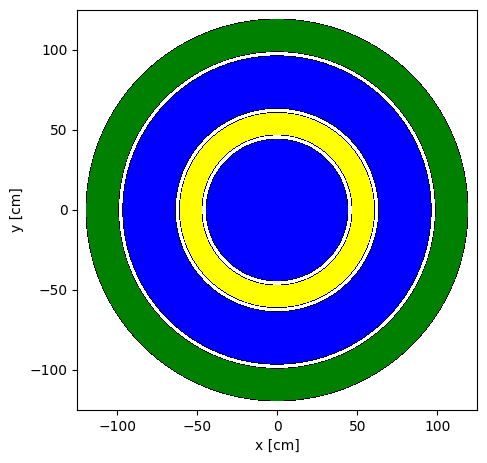

In [41]:
colors = {c[0]: 'blue',c[1]: 'blue', c[2]: 'black', c[3]: 'black', c[4]: 'black', c[5]: 'black', c[6]: 'black' ,c[7]: 'yellow' ,c[8]: 'white', c[9]:'white', c[10]:'white', c[11]:'green', c[12]:'black',c[13]:'black'}
#fig, ax = plt.subplots(figsize=(4, 4), dpi=400)
universe.plot(width=(250, 250), pixels=(400 , 400), colors=colors)#, axes=ax)

In [ ]:
geometry = openmc.Geometry(root=universe)
geometry.export_to_xml()
#Der skal indtastes settings, samt hvad statepoint. Det skal samles i en model of køres.

#srcstart = v3
space = openmc.stats.spherical_uniform(r_outer=rgeo[4],r_inner=rgeo[3])
source = openmc.IndependentSource(space=space)
#settings
settings = openmc.Settings()
settings.source = source
settings.batches = 2000
settings.inactive = 20
settings.particles = 1000
settings.export_to_xml()

# Model og energifilter

In [55]:
model = openmc.Model()
model.settings = settings
model.materials = materials
model.geometry = geometry

In [56]:
#Energifilter
energy_bins = np.logspace(-5, 7, 200)
energy_filter = openmc.EnergyFilter(energy_bins)
flux_tally = openmc.Tally(name='flux_tally')
flux_tally.filters = [energy_filter]
flux_tally.scores = ['flux']
fission_tally = openmc.Tally(name='fission_rate')
fission_tally.scores = ['fission-q-prompt']
tallies = openmc.Tallies([flux_tally,fission_tally])
tallies.export_to_xml()
model.tallies = tallies
#Et filter defineres og kobles på en tally. Tallien får også en score med flux


# fluxberegning

In [57]:
hwater.temperature = 294
fuel.temperature = 294

materials.export_to_xml()
geometry.export_to_xml()
settings.export_to_xml()
model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

PosixPath('/projektarbejde/MSR/statepoint.20.h5')

In [11]:
#keffdens = []
#dens = []

In [12]:
#keff = openmc.StatePoint('statepoint.2000.h5').k_combined
#dens.append(hdens)
#keffdens.append(keff.n)
#print(keffdens)
#Med jern inkluderet.
#densx = np.array(dens)/1.07*100 # % f
keffdensy = keffdens

fig1, ax1 = plt.subplots(1,1,dpi=400)
ax1.plot(densx,keffdensy, 'rx')
ax1.set_xlabel('Moderator $\\rho \%$ density $\simeq$ volume V%')
ax1.set_ylabel('$k_{eff}$')
ax1.grid()

#Stål (mangler Zr)
#steel.add_element('Fe',0.83,'wo') #0.83
#steel.add_element ('Zr',0.15, 'wo')
#steel.add_element('C',0.02, 'wo')
#steel.set_density('g/cm3', 7.73)#7.73

<>:11: SyntaxWarning: invalid escape sequence '\%'
<>:11: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_5754/3338552089.py:11: SyntaxWarning: invalid escape sequence '\%'
  ax1.set_xlabel('Moderator $\\rho \%$ density $\simeq$ volume V%')
/tmp/ipykernel_5754/3338552089.py:11: SyntaxWarning: invalid escape sequence '\%'
  ax1.set_xlabel('Moderator $\\rho \%$ density $\simeq$ volume V%')


NameError: name 'keffdens' is not defined

<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_5754/271925155.py:28: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("Flux ($cm^{-1}\cdot s^{-1}$)")
/openmc_venv/lib/python3.12/site-packages/openmc/tallies.py:450: RuntimeWarning: invalid value encountered in divide
  self._std_dev[nonzero] = np.sqrt((self.sum_sq[nonzero]/n -


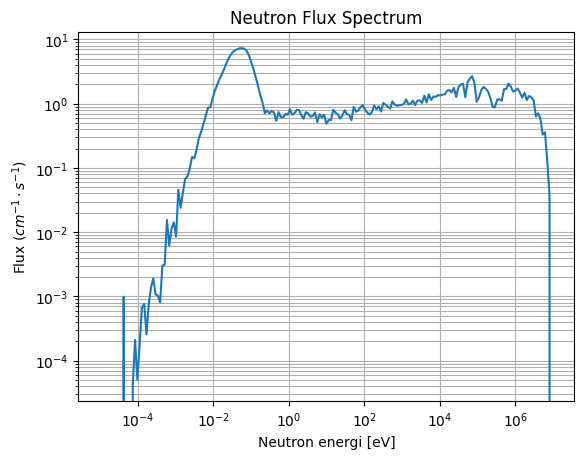

In [13]:
#hent tally

#fissionrate

with openmc.StatePoint("statepoint.2.h5") as sp:
    fission = sp.get_tally(name='fission_rate')

#flux = np.zeros(len(energy_mid))
with openmc.StatePoint("statepoint.2.h5") as sp:
    spectrum_tally = sp.get_tally(name='flux_tally')

#fluxværdier
flux = spectrum_tally.mean.flatten()
flux_unc = spectrum_tally.std_dev.flatten()

#energibins
energy_filter = spectrum_tally.filters[0]
energies = energy_filter.bins

#midtpunkt for hvert bin.
energy_mid = np.sqrt(energies[:, 0] * energies[:, 1])

#plot
plt.figure()
plt.loglog(energy_mid, flux)
#plt.fill_between(energy_mid, flux - flux_unc, flux + flux_unc, alpha=0.3, color='red')
plt.xlabel("Neutron energi [eV]")
plt.ylabel("Flux ($cm^{-1}\cdot s^{-1}$)")
plt.title("Neutron Flux Spectrum")
plt.grid(True, which='both')
plt.show()

In [ ]:
print(fission.mean.sum())

73016035.62995605


# Depletion

In [14]:
#depletion

chain_file = "chain_endfb71_pwr.xml"
operator = openmc.deplete.CoupledOperator(model, chain_file)
power = 80e6 # MW
#time_steps = [3600*24*14,3600*24*14,3600*24*14,3600*24*14,3600*24*14,3600*24*14,3600*24*14,3600*24*14,3600*24*14,3600*24*14,3600*24*14,3600*24*14,3600*24*30,3600*24*30,3600*24*30,3600*24*30,3600*24*30,3600*24*30,365*24 *3600,365*24 *3600,365*24 *3600,365*24 *3600,365*24 *3600,365*24 *3600, 365*24 *3600,365*24 *3600,365*24 *3600]
time_steps = [365*24 *3600]*4
integrator = openmc.deplete.CECMIntegrator(operator, time_steps, power=power,
timestep_units='s')
results = integrator.integrate()
r = openmc.deplete.Results("depletion_results.h5")
print("Number of steps:", len(r))


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

          favor of the model.xml file.


 Reading Fe57 from /root/nndc_hdf5/Fe57.h5
 Reading Fe58 from /root/nndc_hdf5/Fe58.h5
 Reading Zr90 from /root/nndc_hdf5/Zr90.h5
 Reading Zr91 from /root/nndc_hdf5/Zr91.h5
 Reading Zr92 from /root/nndc_hdf5/Zr92.h5
 Reading Zr94 from /root/nndc_hdf5/Zr94.h5
 Reading Zr96 from /root/nndc_hdf5/Zr96.h5
 Reading C0 from /root/nndc_hdf5/C0.h5
 Reading Mo92 from /root/nndc_hdf5/Mo92.h5
 Reading Mo94 from /root/nndc_hdf5/Mo94.h5
 Reading Mo95 from /root/nndc_hdf5/Mo95.h5
 Reading Mo96 from /root/nndc_hdf5/Mo96.h5
 Reading Mo97 from /root/nndc_hdf5/Mo97.h5
 Reading Mo98 from /root/nndc_hdf5/Mo98.h5
 Reading Mo100 from /root/nndc_hdf5/Mo100.h5
 Reading Th232 from /root/nndc_hdf5/Th232.h5
 Minimum neutron data temperature: 294 K
 Maximum neutron data temperature: 294 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
[openmc.deplete] t=0.0 s, dt=31536000 s, source=80000000.0
 Reading H1 from /root/nndc_hdf5/H1.h5
 Reading H3 from /root/nndc_hdf5/H3.h5
 Reading He3 from /root/

 Reading Mg24 from /root/nndc_hdf5/Mg24.h5
 Reading Mg25 from /root/nndc_hdf5/Mg25.h5
 Reading Mg26 from /root/nndc_hdf5/Mg26.h5
 Reading Al27 from /root/nndc_hdf5/Al27.h5
 Reading Si28 from /root/nndc_hdf5/Si28.h5
 Reading Si29 from /root/nndc_hdf5/Si29.h5
 Reading Si30 from /root/nndc_hdf5/Si30.h5
 Reading P31 from /root/nndc_hdf5/P31.h5
 Reading S32 from /root/nndc_hdf5/S32.h5
 Reading S33 from /root/nndc_hdf5/S33.h5
 Reading S34 from /root/nndc_hdf5/S34.h5
 Reading S36 from /root/nndc_hdf5/S36.h5
 Reading Cl35 from /root/nndc_hdf5/Cl35.h5
 Reading Cl37 from /root/nndc_hdf5/Cl37.h5
 Reading Ar36 from /root/nndc_hdf5/Ar36.h5
 Reading Ar38 from /root/nndc_hdf5/Ar38.h5
 Reading Ar40 from /root/nndc_hdf5/Ar40.h5
 Reading K39 from /root/nndc_hdf5/K39.h5
 Reading K40 from /root/nndc_hdf5/K40.h5
 Reading K41 from /root/nndc_hdf5/K41.h5
 Reading Ca40 from /root/nndc_hdf5/Ca40.h5
 Reading Ca42 from /root/nndc_hdf5/Ca42.h5
 Reading Ca43 from /root/nndc_hdf5/Ca43.h5


 Reading Ca44 from /root/nndc_hdf5/Ca44.h5
 Reading Ca46 from /root/nndc_hdf5/Ca46.h5
 Reading Ca48 from /root/nndc_hdf5/Ca48.h5
 Reading Sc45 from /root/nndc_hdf5/Sc45.h5
 Reading Ti46 from /root/nndc_hdf5/Ti46.h5
 Reading Ti47 from /root/nndc_hdf5/Ti47.h5
 Reading Ti48 from /root/nndc_hdf5/Ti48.h5
 Reading Ti49 from /root/nndc_hdf5/Ti49.h5
 Reading Ti50 from /root/nndc_hdf5/Ti50.h5
 Reading V50 from /root/nndc_hdf5/V50.h5
 Reading V51 from /root/nndc_hdf5/V51.h5
 Reading Cr50 from /root/nndc_hdf5/Cr50.h5
 Reading Cr52 from /root/nndc_hdf5/Cr52.h5
 Reading Cr53 from /root/nndc_hdf5/Cr53.h5
 Reading Cr54 from /root/nndc_hdf5/Cr54.h5
 Reading Mn55 from /root/nndc_hdf5/Mn55.h5
 Reading Co58 from /root/nndc_hdf5/Co58.h5
 Reading Co58_m1 from /root/nndc_hdf5/Co58_m1.h5
 Reading Co59 from /root/nndc_hdf5/Co59.h5
 Reading Ni58 from /root/nndc_hdf5/Ni58.h5
 Reading Ni59 from /root/nndc_hdf5/Ni59.h5
 Reading Ni60 from /root/nndc_hdf5/Ni60.h5
 Reading Ni61 from /root/nndc_hdf5/Ni61.h5
 Reading 

 Reading Br81 from /root/nndc_hdf5/Br81.h5
 Reading Kr78 from /root/nndc_hdf5/Kr78.h5
 Reading Kr80 from /root/nndc_hdf5/Kr80.h5
 Reading Kr82 from /root/nndc_hdf5/Kr82.h5
 Reading Kr83 from /root/nndc_hdf5/Kr83.h5
 Reading Kr84 from /root/nndc_hdf5/Kr84.h5
 Reading Kr85 from /root/nndc_hdf5/Kr85.h5
 Reading Kr86 from /root/nndc_hdf5/Kr86.h5
 Reading Rb85 from /root/nndc_hdf5/Rb85.h5
 Reading Rb86 from /root/nndc_hdf5/Rb86.h5
 Reading Rb87 from /root/nndc_hdf5/Rb87.h5
 Reading Sr84 from /root/nndc_hdf5/Sr84.h5
 Reading Sr86 from /root/nndc_hdf5/Sr86.h5
 Reading Sr87 from /root/nndc_hdf5/Sr87.h5
 Reading Sr88 from /root/nndc_hdf5/Sr88.h5
 Reading Sr89 from /root/nndc_hdf5/Sr89.h5
 Reading Sr90 from /root/nndc_hdf5/Sr90.h5
 Reading Y89 from /root/nndc_hdf5/Y89.h5
 Reading Y90 from /root/nndc_hdf5/Y90.h5
 Reading Y91 from /root/nndc_hdf5/Y91.h5
 Reading Zr93 from /root/nndc_hdf5/Zr93.h5
 Reading Zr95 from /root/nndc_hdf5/Zr95.h5
 Reading Nb93 from /root/nndc_hdf5/Nb93.h5
 Reading Nb94 fro

 Reading Nb95 from /root/nndc_hdf5/Nb95.h5
 Reading Mo99 from /root/nndc_hdf5/Mo99.h5
 Reading Tc99 from /root/nndc_hdf5/Tc99.h5
 Reading Ru96 from /root/nndc_hdf5/Ru96.h5
 Reading Ru98 from /root/nndc_hdf5/Ru98.h5
 Reading Ru99 from /root/nndc_hdf5/Ru99.h5
 Reading Ru100 from /root/nndc_hdf5/Ru100.h5
 Reading Ru101 from /root/nndc_hdf5/Ru101.h5
 Reading Ru102 from /root/nndc_hdf5/Ru102.h5
 Reading Ru103 from /root/nndc_hdf5/Ru103.h5
 Reading Ru104 from /root/nndc_hdf5/Ru104.h5
 Reading Ru105 from /root/nndc_hdf5/Ru105.h5
 Reading Ru106 from /root/nndc_hdf5/Ru106.h5
 Reading Rh103 from /root/nndc_hdf5/Rh103.h5
 Reading Rh105 from /root/nndc_hdf5/Rh105.h5
 Reading Pd102 from /root/nndc_hdf5/Pd102.h5
 Reading Pd104 from /root/nndc_hdf5/Pd104.h5
 Reading Pd105 from /root/nndc_hdf5/Pd105.h5
 Reading Pd106 from /root/nndc_hdf5/Pd106.h5
 Reading Pd107 from /root/nndc_hdf5/Pd107.h5
 Reading Pd108 from /root/nndc_hdf5/Pd108.h5
 Reading Pd110 from /root/nndc_hdf5/Pd110.h5
 Reading Ag107 from /r

 Reading Cd108 from /root/nndc_hdf5/Cd108.h5
 Reading Cd110 from /root/nndc_hdf5/Cd110.h5
 Reading Cd111 from /root/nndc_hdf5/Cd111.h5
 Reading Cd112 from /root/nndc_hdf5/Cd112.h5
 Reading Cd113 from /root/nndc_hdf5/Cd113.h5
 Reading Cd114 from /root/nndc_hdf5/Cd114.h5
 Reading Cd115_m1 from /root/nndc_hdf5/Cd115_m1.h5
 Reading Cd116 from /root/nndc_hdf5/Cd116.h5
 Reading In113 from /root/nndc_hdf5/In113.h5
 Reading In115 from /root/nndc_hdf5/In115.h5
 Reading Sn112 from /root/nndc_hdf5/Sn112.h5
 Reading Sn113 from /root/nndc_hdf5/Sn113.h5
 Reading Sn114 from /root/nndc_hdf5/Sn114.h5
 Reading Sn115 from /root/nndc_hdf5/Sn115.h5
 Reading Sn116 from /root/nndc_hdf5/Sn116.h5
 Reading Sn117 from /root/nndc_hdf5/Sn117.h5
 Reading Sn118 from /root/nndc_hdf5/Sn118.h5
 Reading Sn119 from /root/nndc_hdf5/Sn119.h5
 Reading Sn120 from /root/nndc_hdf5/Sn120.h5
 Reading Sn122 from /root/nndc_hdf5/Sn122.h5
 Reading Sn123 from /root/nndc_hdf5/Sn123.h5
 Reading Sn124 from /root/nndc_hdf5/Sn124.h5
 Rea

 Reading Te122 from /root/nndc_hdf5/Te122.h5
 Reading Te123 from /root/nndc_hdf5/Te123.h5
 Reading Te124 from /root/nndc_hdf5/Te124.h5
 Reading Te125 from /root/nndc_hdf5/Te125.h5
 Reading Te126 from /root/nndc_hdf5/Te126.h5
 Reading Te127_m1 from /root/nndc_hdf5/Te127_m1.h5
 Reading Te128 from /root/nndc_hdf5/Te128.h5
 Reading Te129_m1 from /root/nndc_hdf5/Te129_m1.h5
 Reading Te130 from /root/nndc_hdf5/Te130.h5
 Reading Te132 from /root/nndc_hdf5/Te132.h5
 Reading I127 from /root/nndc_hdf5/I127.h5
 Reading I129 from /root/nndc_hdf5/I129.h5
 Reading I130 from /root/nndc_hdf5/I130.h5
 Reading I131 from /root/nndc_hdf5/I131.h5
 Reading I135 from /root/nndc_hdf5/I135.h5
 Reading Xe123 from /root/nndc_hdf5/Xe123.h5
 Reading Xe124 from /root/nndc_hdf5/Xe124.h5
 Reading Xe126 from /root/nndc_hdf5/Xe126.h5


 Reading Xe128 from /root/nndc_hdf5/Xe128.h5
 Reading Xe129 from /root/nndc_hdf5/Xe129.h5
 Reading Xe130 from /root/nndc_hdf5/Xe130.h5
 Reading Xe131 from /root/nndc_hdf5/Xe131.h5
 Reading Xe132 from /root/nndc_hdf5/Xe132.h5
 Reading Xe133 from /root/nndc_hdf5/Xe133.h5
 Reading Xe134 from /root/nndc_hdf5/Xe134.h5
 Reading Xe135 from /root/nndc_hdf5/Xe135.h5
 Reading Xe136 from /root/nndc_hdf5/Xe136.h5
 Reading Cs133 from /root/nndc_hdf5/Cs133.h5
 Reading Cs134 from /root/nndc_hdf5/Cs134.h5
 Reading Cs135 from /root/nndc_hdf5/Cs135.h5
 Reading Cs136 from /root/nndc_hdf5/Cs136.h5
 Reading Cs137 from /root/nndc_hdf5/Cs137.h5
 Reading Ba130 from /root/nndc_hdf5/Ba130.h5
 Reading Ba132 from /root/nndc_hdf5/Ba132.h5
 Reading Ba133 from /root/nndc_hdf5/Ba133.h5
 Reading Ba134 from /root/nndc_hdf5/Ba134.h5
 Reading Ba135 from /root/nndc_hdf5/Ba135.h5
 Reading Ba136 from /root/nndc_hdf5/Ba136.h5
 Reading Ba137 from /root/nndc_hdf5/Ba137.h5
 Reading Ba138 from /root/nndc_hdf5/Ba138.h5
 Reading B

 Reading Ce136 from /root/nndc_hdf5/Ce136.h5
 Reading Ce138 from /root/nndc_hdf5/Ce138.h5
 Reading Ce139 from /root/nndc_hdf5/Ce139.h5
 Reading Ce140 from /root/nndc_hdf5/Ce140.h5
 Reading Ce141 from /root/nndc_hdf5/Ce141.h5
 Reading Ce142 from /root/nndc_hdf5/Ce142.h5
 Reading Ce143 from /root/nndc_hdf5/Ce143.h5
 Reading Ce144 from /root/nndc_hdf5/Ce144.h5
 Reading Pr141 from /root/nndc_hdf5/Pr141.h5
 Reading Pr142 from /root/nndc_hdf5/Pr142.h5
 Reading Pr143 from /root/nndc_hdf5/Pr143.h5
 Reading Nd142 from /root/nndc_hdf5/Nd142.h5
 Reading Nd143 from /root/nndc_hdf5/Nd143.h5
 Reading Nd144 from /root/nndc_hdf5/Nd144.h5
 Reading Nd145 from /root/nndc_hdf5/Nd145.h5
 Reading Nd146 from /root/nndc_hdf5/Nd146.h5
 Reading Nd147 from /root/nndc_hdf5/Nd147.h5
 Reading Nd148 from /root/nndc_hdf5/Nd148.h5
 Reading Nd150 from /root/nndc_hdf5/Nd150.h5
 Reading Pm147 from /root/nndc_hdf5/Pm147.h5
 Reading Pm148 from /root/nndc_hdf5/Pm148.h5
 Reading Pm148_m1 from /root/nndc_hdf5/Pm148_m1.h5
 Rea

 Reading Gd153 from /root/nndc_hdf5/Gd153.h5
 Reading Gd154 from /root/nndc_hdf5/Gd154.h5
 Reading Gd155 from /root/nndc_hdf5/Gd155.h5
 Reading Gd156 from /root/nndc_hdf5/Gd156.h5
 Reading Gd157 from /root/nndc_hdf5/Gd157.h5
 Reading Gd158 from /root/nndc_hdf5/Gd158.h5
 Reading Gd160 from /root/nndc_hdf5/Gd160.h5
 Reading Tb159 from /root/nndc_hdf5/Tb159.h5
 Reading Tb160 from /root/nndc_hdf5/Tb160.h5
 Reading Dy156 from /root/nndc_hdf5/Dy156.h5
 Reading Dy158 from /root/nndc_hdf5/Dy158.h5
 Reading Dy160 from /root/nndc_hdf5/Dy160.h5
 Reading Dy161 from /root/nndc_hdf5/Dy161.h5
 Reading Dy162 from /root/nndc_hdf5/Dy162.h5
 Reading Dy163 from /root/nndc_hdf5/Dy163.h5
 Reading Dy164 from /root/nndc_hdf5/Dy164.h5
 Reading Ho165 from /root/nndc_hdf5/Ho165.h5
 Reading Ho166_m1 from /root/nndc_hdf5/Ho166_m1.h5
 Reading Er162 from /root/nndc_hdf5/Er162.h5
 Reading Er164 from /root/nndc_hdf5/Er164.h5
 Reading Er166 from /root/nndc_hdf5/Er166.h5
 Reading Er167 from /root/nndc_hdf5/Er167.h5
 Rea

Text(0.5, 0, 'Time (yr)')

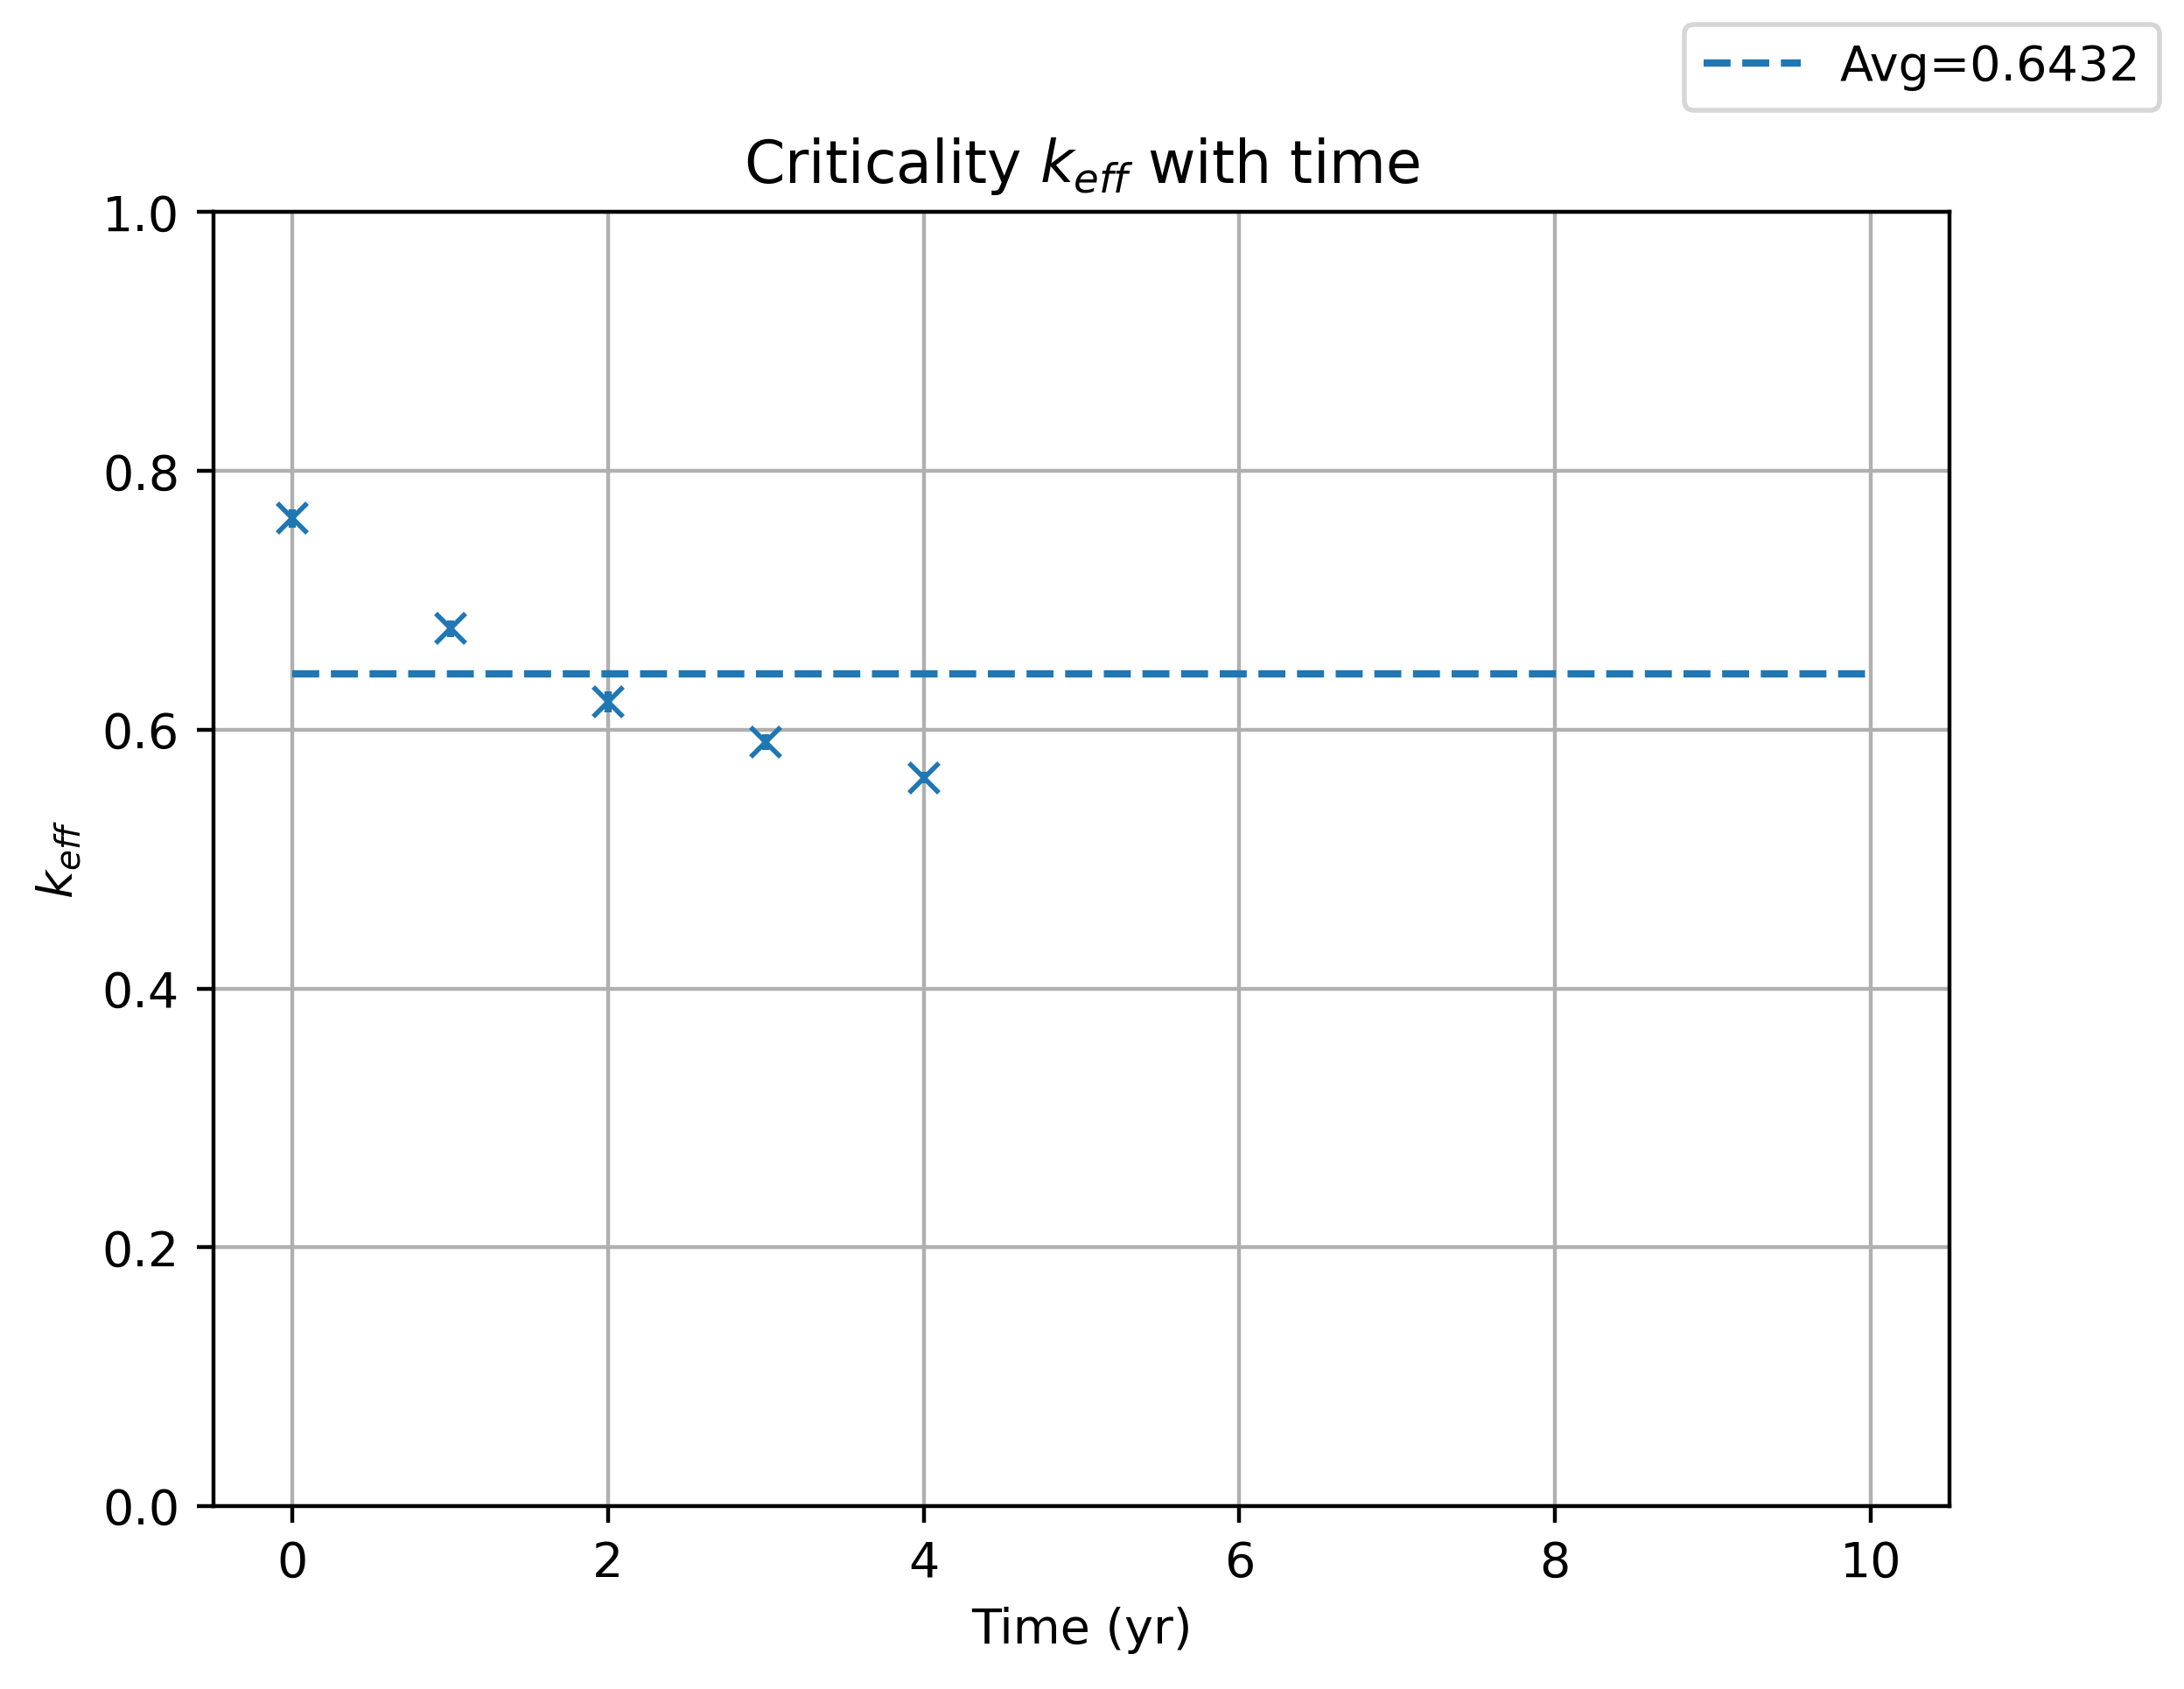

In [15]:
#K-effective plot:
n = len(r)
keffs = np.array([r.get_keff("s")[1][step][0] for step in range(n)])
keff_err = np.array([r.get_keff("s")[1][step][1] for step in range(n)])

ktimes = np.array(r.get_keff("s")[0])    # sekunder

kfig, kax = plt.subplots(1,1,dpi=400)
#kax.plot(ktimes/(24*3600*30),keffs,'o')
kax.errorbar(ktimes/(24*3600*365), keffs,fmt='x', yerr=keff_err,)
gns = np.sum(keffs)/len(keffs)
kax.hlines(gns,0,10,label=f"Avg={gns:.4f}",linestyle='--')
kfig.legend()
kax.set_title('Criticality $k_{eff}$ with time')
    
    
if abs(gns-1) < 0.3:
    y=2
elif gns < 1:
    y = 1
elif gns > 1:
    y = 2
kax.set_ylim(0,y)
kax.grid()
kax.set_ylabel('$k_{eff}$')
kax.set_xlabel('Time (yr)')

# Burnup

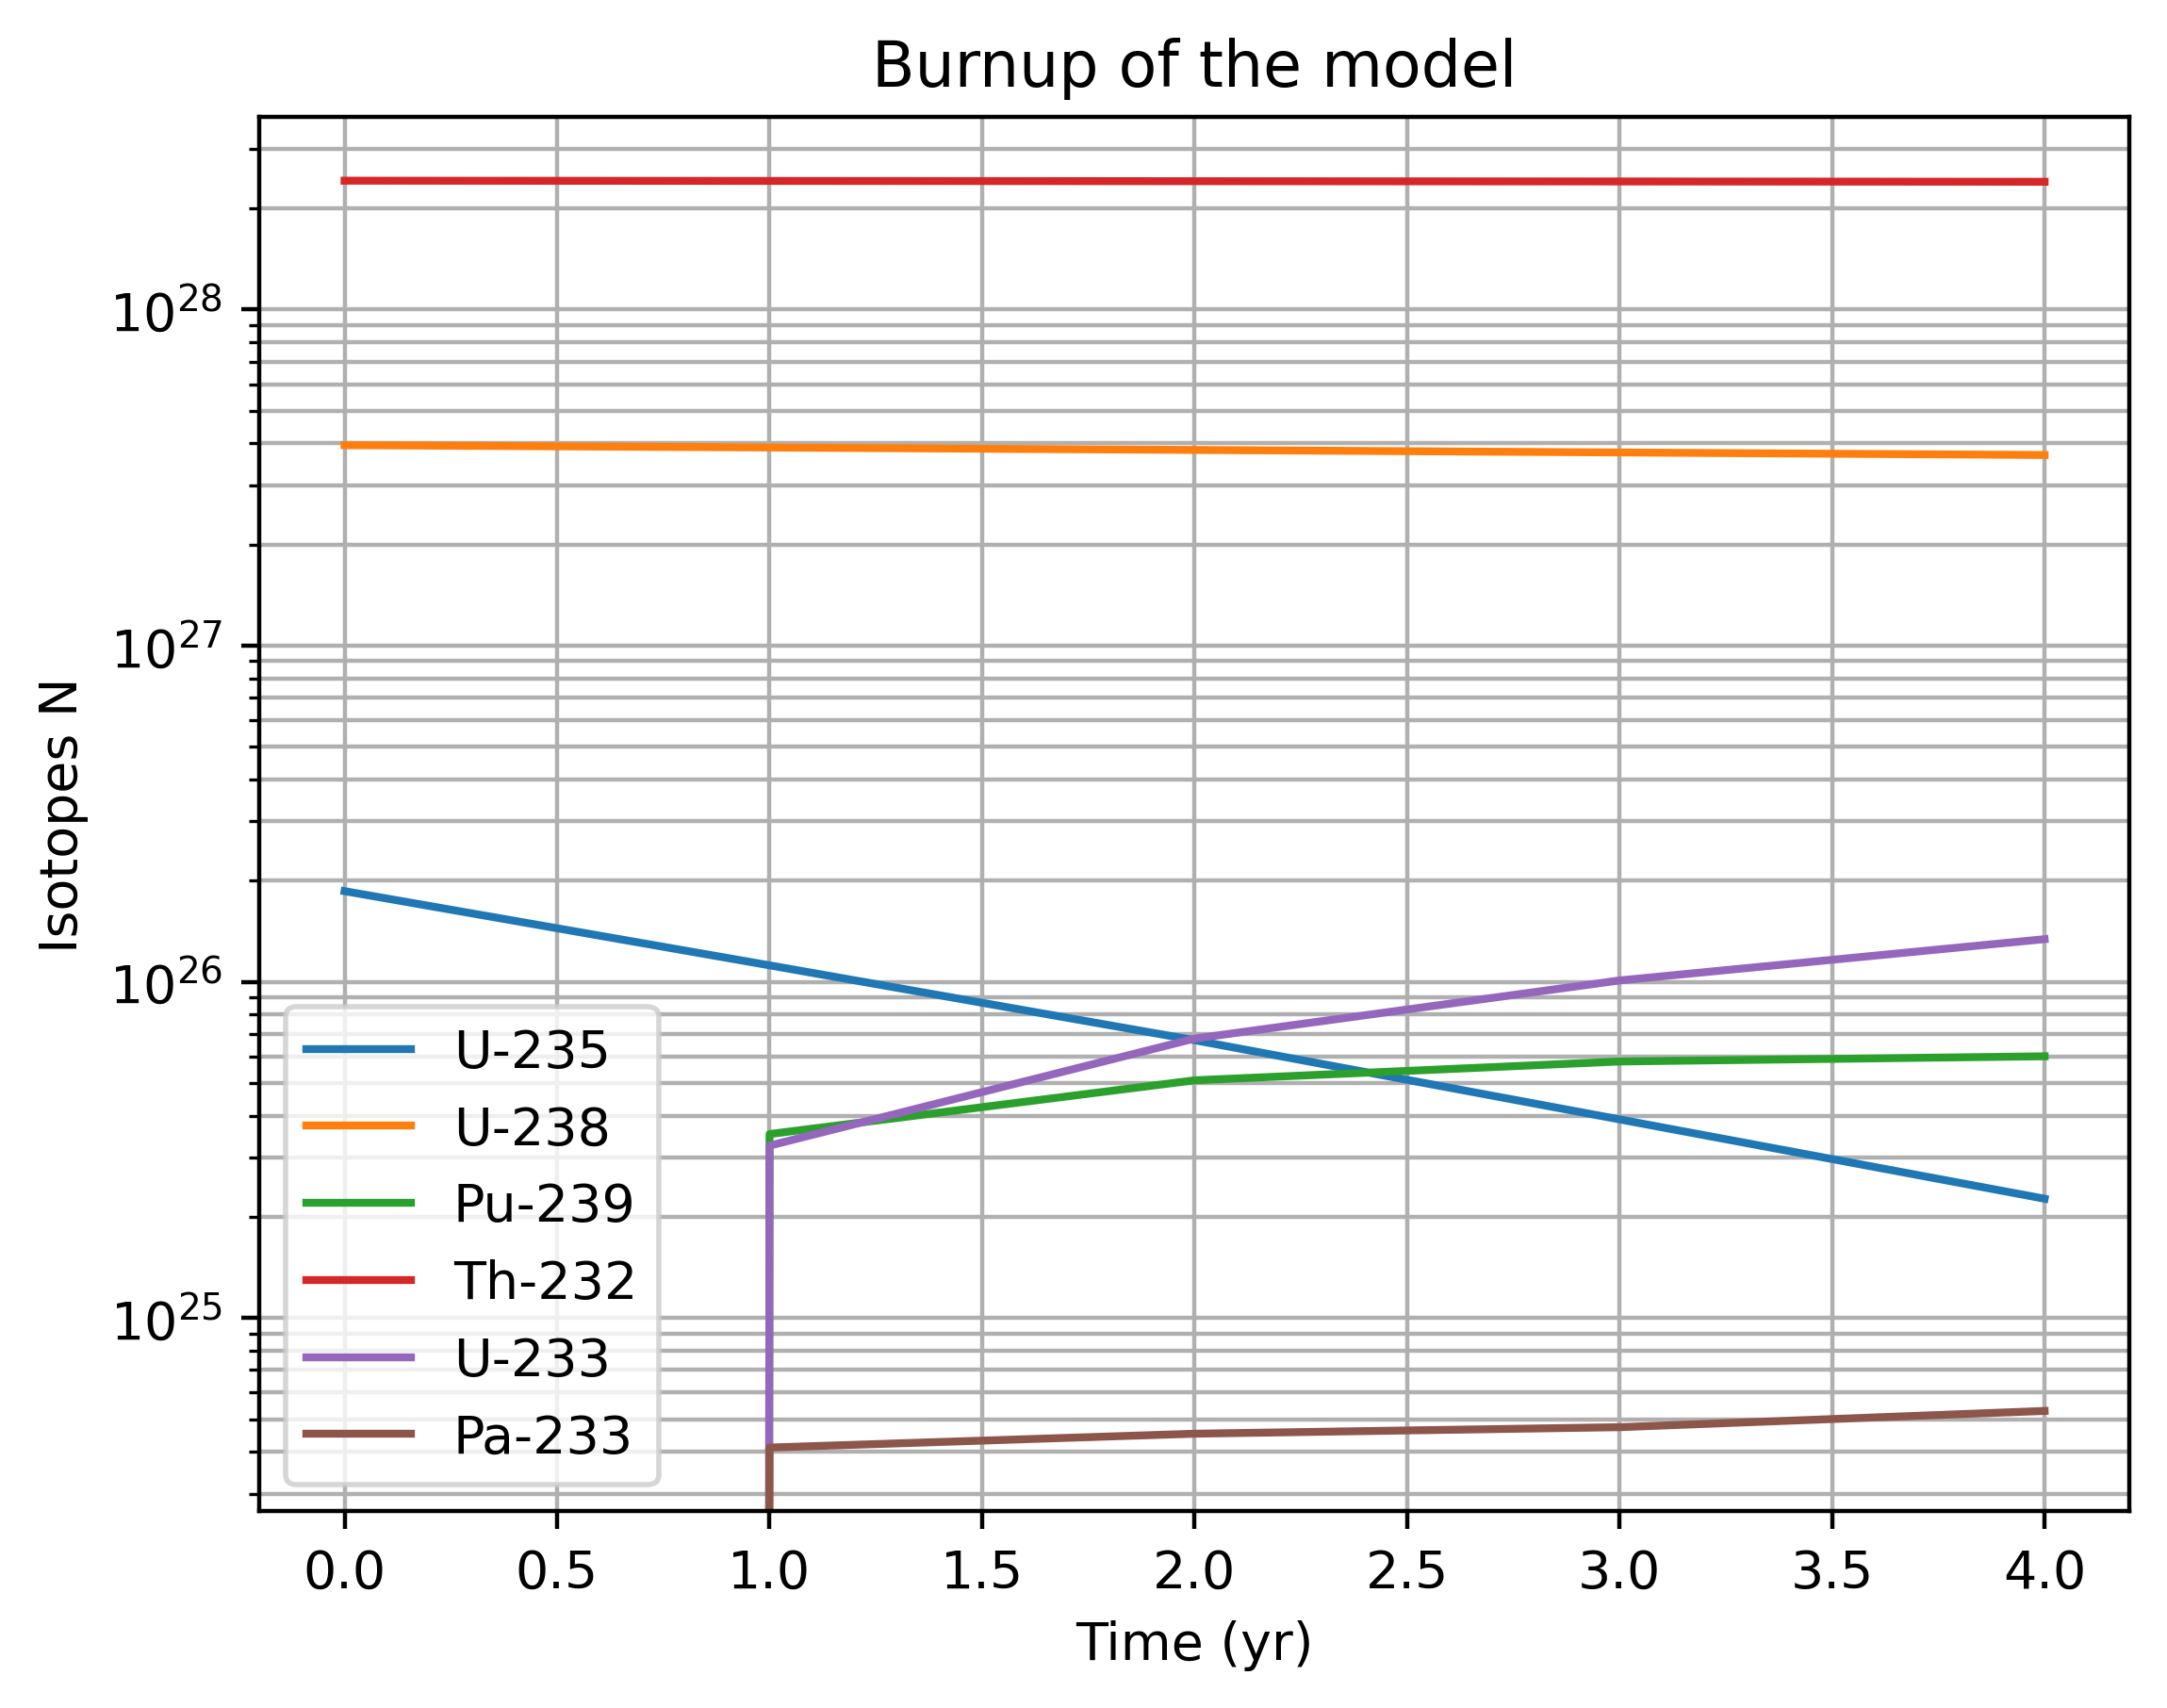

In [16]:
#Få N_i (antallet af en i isotop) til timesteps:

u235 = np.array(r.get_atoms(mat=str(fuel.id), nuc="U235", nuc_units="atoms", time_units="s"))
u238 = np.array(r.get_atoms(mat=str(fuel.id), nuc="U238", nuc_units="atoms", time_units="s"))
u233 = np.array(r.get_atoms(mat=str(blanket.id), nuc="U233", nuc_units="atoms", time_units="s"))
pa233 = np.array(r.get_atoms(mat=str(blanket.id), nuc="Pa233", nuc_units="atoms", time_units="s"))

Pu239 = np.array(r.get_atoms(mat=str(fuel.id), nuc="Pu239", nuc_units="atoms", time_units="s"))
Th232 = np.array(r.get_atoms(mat=str(blanket.id), nuc="Th232", nuc_units="atoms", time_units="s"))

# Definer figur
bfig, bax = plt.subplots(1,1,dpi=400)
btimes = u235[0]/(24*3600*365) # år
bax.plot(btimes, u235[1], label="U-235")
bax.plot(btimes, u238[1], label="U-238")
bax.plot(btimes, Pu239[1], label="Pu-239")
bax.plot(btimes, Th232[1], label="Th-232")
bax.plot(btimes, u233[1], label="U-233")
bax.plot(btimes, pa233[1], label="Pa-233")
#bax.plot(btimes, Pu239[1], label="Pu-239")
bax.set_yscale("log")
bax.set_ylabel('Isotopes N')
bax.set_xlabel('Time (yr)')
bax.legend()
bax.set_title('Burnup of the model')
bax.grid(which="both")


In [ ]:
print(blanket.nuclides)

[NuclideTuple(name='Li7', percent=1, percent_type='ao'), NuclideTuple(name='F19', percent=5.0, percent_type='ao'), NuclideTuple(name='Th232', percent=1, percent_type='ao')]


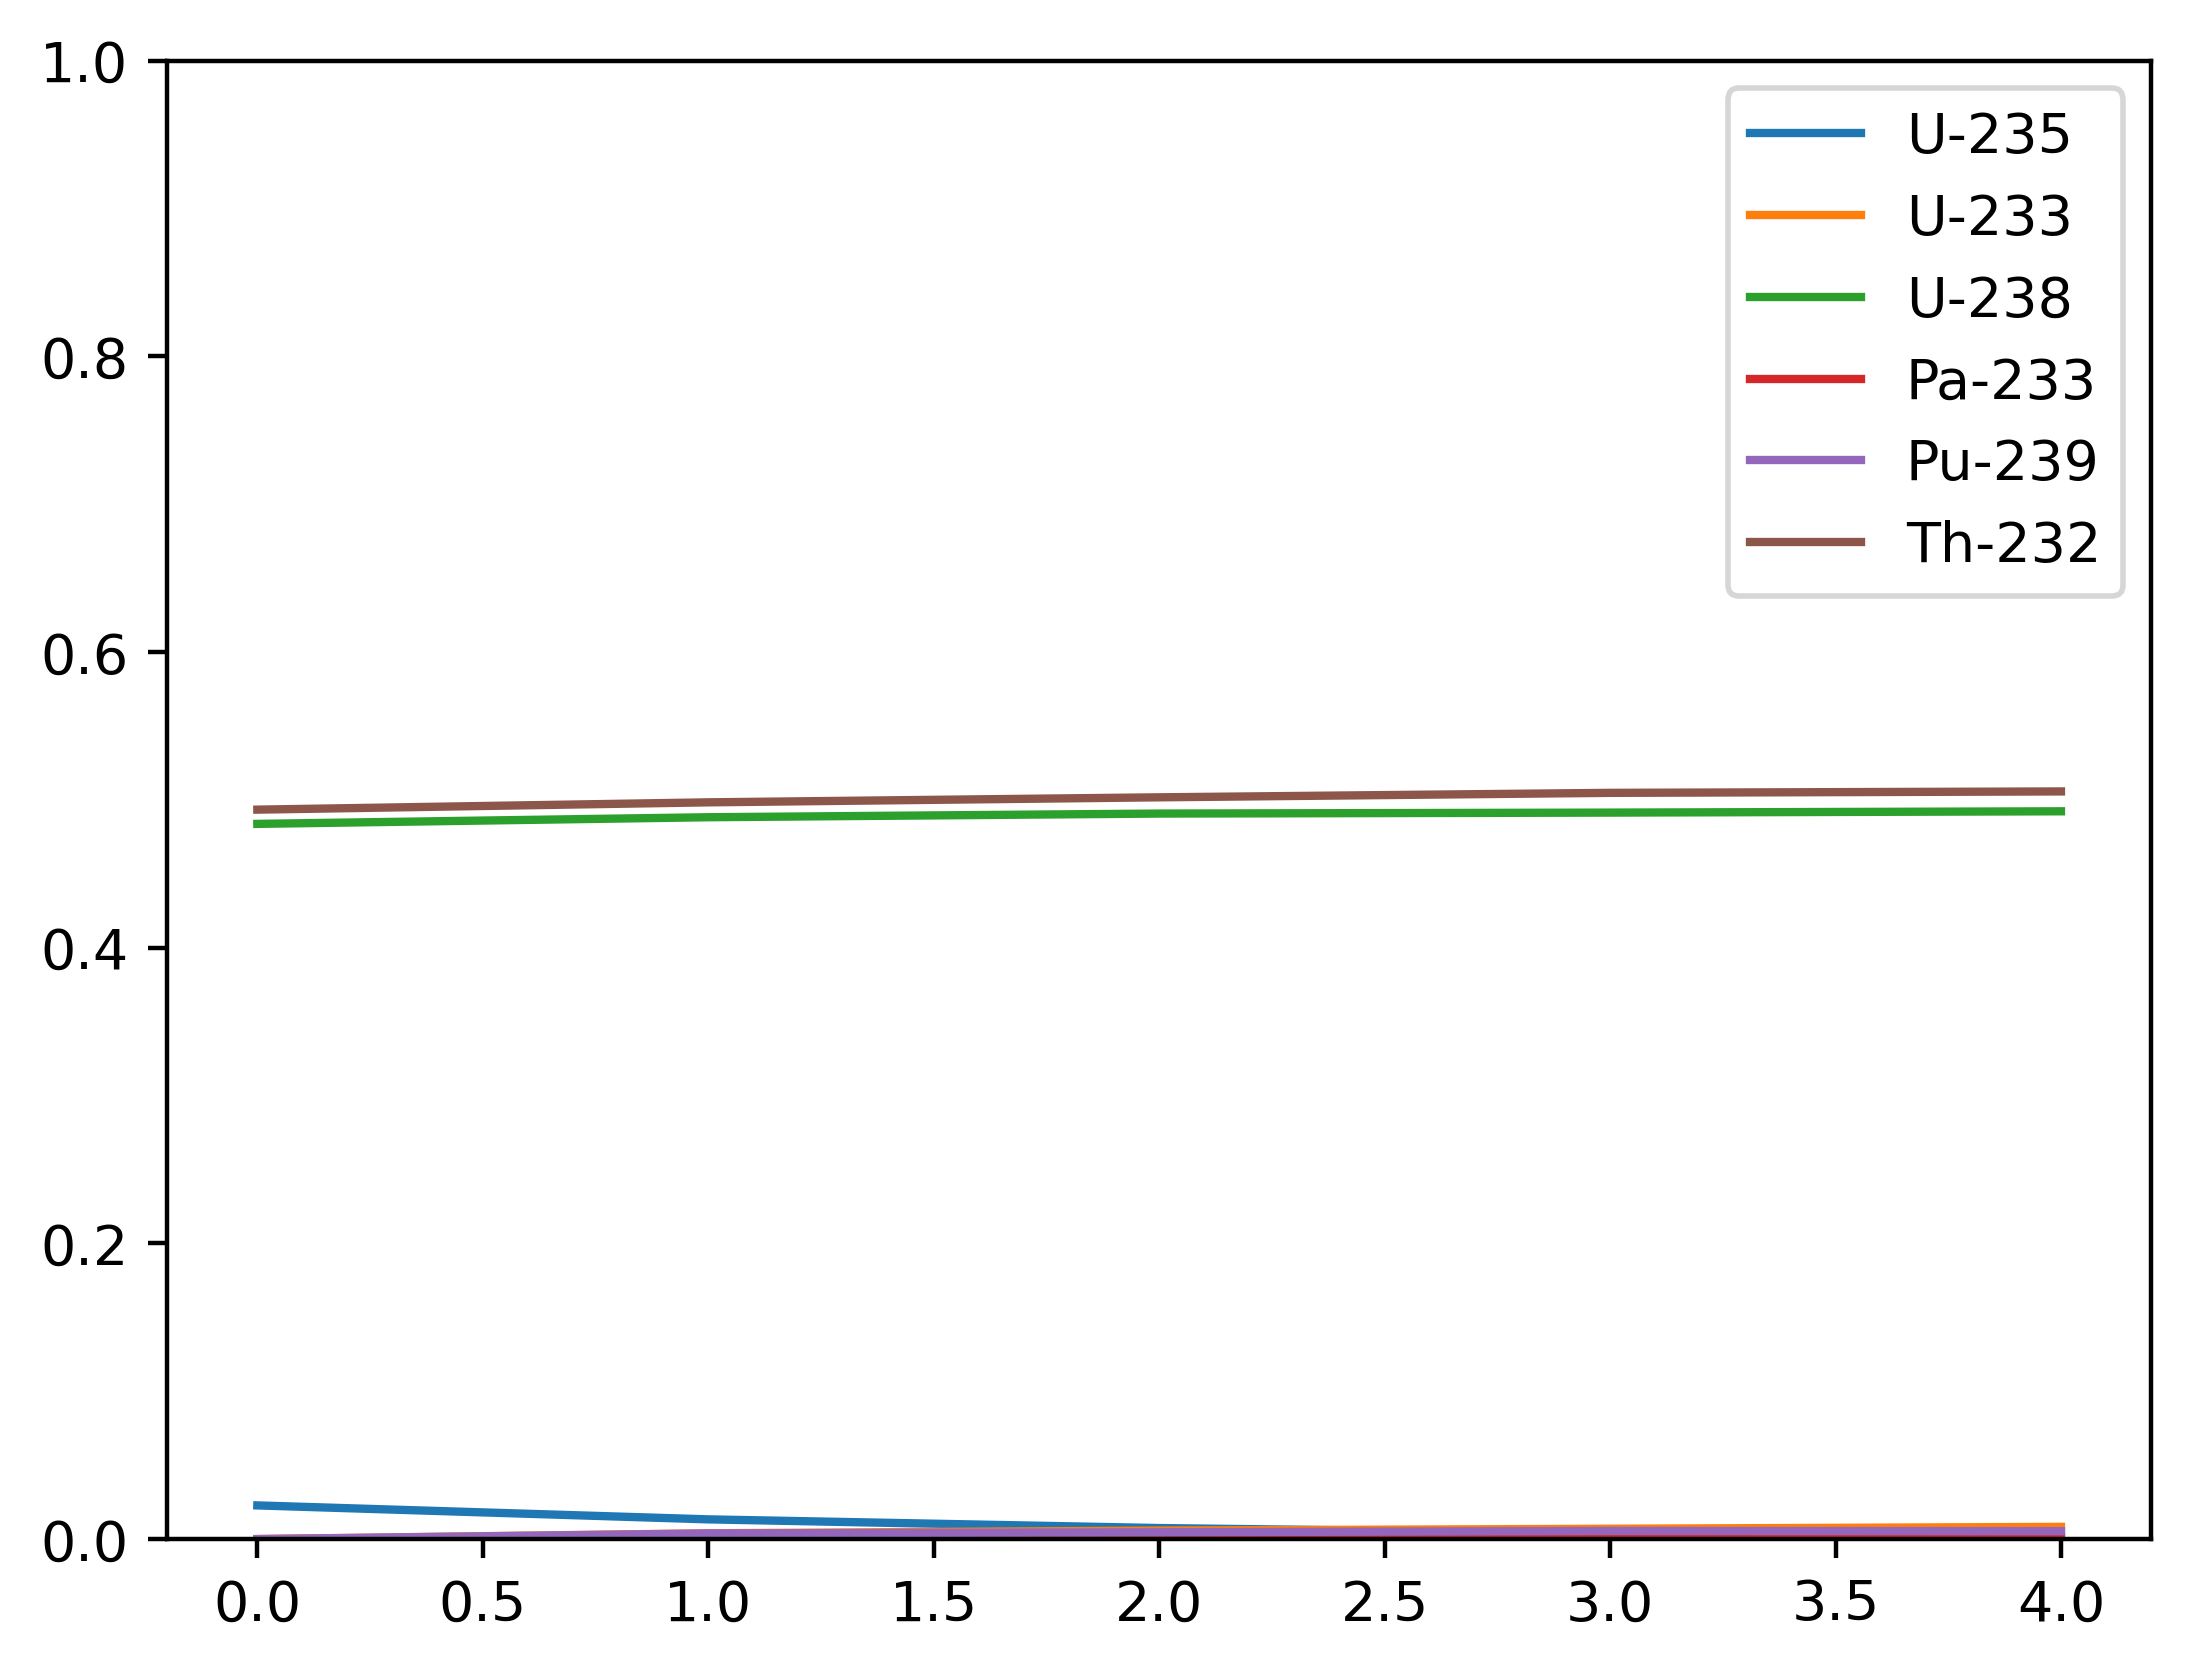

In [ ]:
#atomar fraktion:
sum_i = u235[1] + u238[1]+ Th232[1]
fu235 = u235[1]/sum_i
fu238 = u238[1]/sum_i
fPu239 = Pu239[1]/sum_i
fTh232 = Th232[1]/sum_i
fu233 = u233[1]/sum_i
fpa233= pa233[1]/sum_i

afig, aax = plt.subplots(1,1,dpi=400)
aax.plot(btimes,fu235,label='U-235')
aax.plot(btimes,fu233,label='U-233')
aax.plot(btimes,fu238,label='U-238')
aax.plot(btimes,fpa233,label='Pa-233')
aax.plot(btimes,fPu239,label='Pu-239')
aax.plot(btimes,fTh232,label='Th-232')
aax.set_ylim(0,1)
aax.legend()


In [ ]:
#Kig på materialet jern (SENERE). Vis jern er et problem og hvis fjernet vil blive kritisk.
#Start med en rapport først nu.